In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

In [316]:
# load data from parameter sweep
data_set = '30_cars_3_lanes.csv'
df = pd.read_csv(f'data/{data_set}')

In [307]:
# average the values across each of the identical 3 runs:
data = df.groupby(['reckless', 'cautious', 'normal']).mean().reset_index()
data.head(10)

,reckless,cautious,normal,num_epochs,num_cars,avg_diff_speed_reckless,avg_diff_speed_cautious,avg_diff_speed_normal,avg_lane_changes,avg_speed
0,0.0,0.0,1.0,NaN,30.0,0.0,0.000000,139.384001,0.952048,0.735051
1,0.0,0.1,0.9,NaN,30.0,0.0,86.967612,118.728169,0.956549,0.755517
2,0.0,0.2,0.8,NaN,30.0,0.0,136.739317,151.312436,0.937422,0.689767
3,0.0,0.3,0.7,NaN,30.0,0.0,157.305932,154.451911,0.958076,0.662487
4,0.0,0.4,0.6,NaN,30.0,0.0,169.507729,154.035333,0.963315,0.664197
5,0.0,0.5,0.5,NaN,30.0,0.0,180.071962,182.559068,0.947043,0.608886
6,0.0,0.6,0.4,NaN,30.0,0.0,184.412003,190.180789,0.927904,0.611765
7,0.0,0.7,0.3,NaN,30.0,0.0,192.938136,180.265624,0.915165,0.589249
8,0.0,0.8,0.2,NaN,30.0,0.0,204.345058,208.705707,0.954525,0.559769
9,0.0,0.9,0.1,NaN,30.0,0.0,204.577398,193.271706,0.943033,0.556314


Text(0, 0.5, 'Total Speed Difference over an entire simulation run')

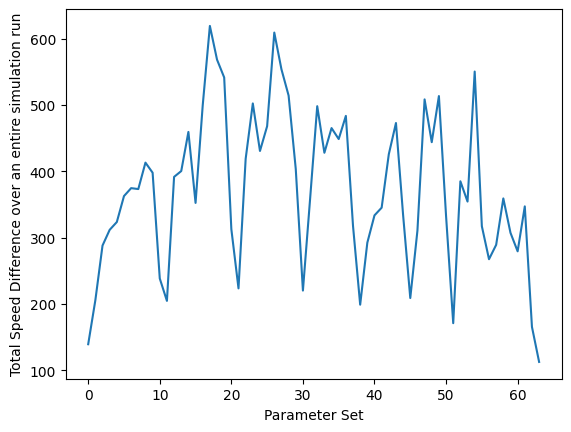

In [308]:
# make a column for sum(avg(|car_speed - desired speed|) per timestep)
data['total_speed_diff'] = data['avg_diff_speed_cautious'] + data['avg_diff_speed_reckless'] + data['avg_diff_speed_normal']

# plot the total speed difference
plt.plot(data['total_speed_diff'])
plt.xlabel("Parameter Set")
plt.ylabel("Total Speed Difference over an entire simulation run")

In [309]:
# get the output matrix from the 2d parameter sweep
def get_matrix_to_plot(input_df, dependent_variable):
    """Get matrix to print for a certain data frame (for a dependent variable)."""
    reckless_p = np.arange(0.0, 1.1, 0.1)
    cautious_p = np.arange(0.0, 1.1, 0.1)
    reckless_p = np.round(reckless_p, 1)
    cautious_p = np.round(cautious_p, 1)

    output_mat = np.zeros((len(reckless_p), len(cautious_p)))
    for reckless in reckless_p:
        for cautious in cautious_p:
            try:
                reckless_index = len(reckless_p) - 1 - int(reckless*10)
                cautious_index = int(cautious*10)
                val = input_df[(input_df['reckless'] == reckless) & (input_df['cautious'] == cautious)][dependent_variable].values[0]
                output_mat[reckless_index, cautious_index] = val
            except:
                pass
    return output_mat

### Here are the different functions we will use to plot the 2d parameter sweep:

In [310]:
def plot_diff_in_desired_speed(speeds):
  """Plot 2d parameter sweep."""
  fig, ax = plt.subplots()

  img = plt.imshow(speeds, cmap='viridis', interpolation='none')

  # Add a color bar with number labels
  cbar = plt.colorbar(img, ax=ax)  # Attach color bar to the plot

  a = ax.set_xticks(range(11))
  a = ax.set_xticklabels(np.arange(0,11)/10)
  a = ax.set_yticks(range(11))
  a = ax.set_yticklabels(np.arange(10,-1,-1)/10)
  a = plt.ylabel('Starting Reckless Percent')
  a = plt.xlabel('Starting Cautious Percent')
  a = plt.title('Mean difference in |speed - desired speed|, for 500 timesteps')
  plt.savefig('speed_diff.png')
  plt.show()
  
  # display.clear_output(wait=True)

In [311]:
def plot_log_avg_lane_changes(lane_changes):
  """Plot 2d parameter sweep."""
  fig, ax = plt.subplots()
  log_lane_changes = np.log(lane_changes)
  log_lane_changes = np.nan_to_num(log_lane_changes, copy=True, nan=0.0, posinf=0.0, neginf=0.0)
  img = plt.imshow(log_lane_changes, cmap='viridis', interpolation='none')

  cbar = plt.colorbar(img, ax=ax)  # Attach color bar to the plot

  a = ax.set_xticks(range(11))
  a = ax.set_xticklabels(np.arange(0,11)/10)
  a = ax.set_yticks(range(11))
  a = ax.set_yticklabels(np.arange(10,-1,-1)/10)
  a = plt.ylabel('Starting Reckless Percent')
  a = plt.xlabel('Starting Cautious Percent')
  a = plt.title('Log of avg lane change frequency, for 500 timesteps')
  plt.savefig('log_lane_changes.png')
  plt.show()
  
  # display.clear_output(wait=True)

In [312]:
def plot_avg_lane_changes(lane_changes):
  """Plot 2d parameter sweep."""
  fig, ax = plt.subplots()
  img = plt.imshow(lane_changes, cmap='Blues', interpolation='none')

  cbar = plt.colorbar(img, ax=ax)  # Attach color bar to the plot

  a = ax.set_xticks(range(11))
  a = ax.set_xticklabels(np.arange(0,11)/10)
  a = ax.set_yticks(range(11))
  a = ax.set_yticklabels(np.arange(10,-1,-1)/10)
  a = plt.ylabel('Starting Reckless Percent')
  a = plt.xlabel('Starting Cautious Percent')
  a = plt.title('Avg lane change frequency, for 500 timesteps')
  plt.savefig('linear_lane_changes.png')
  plt.show()
  
  # display.clear_output(wait=True)

In [313]:
def plot_avg_speed(avg_speeds):
  """Plot 2d parameter sweep."""
  fig, ax = plt.subplots()
  img = plt.imshow(avg_speeds, cmap='viridis', interpolation='none')

  cbar = plt.colorbar(img, ax=ax)  # Attach color bar to the plot

  a = ax.set_xticks(range(11))
  a = ax.set_xticklabels(np.arange(0,11)/10)
  a = ax.set_yticks(range(11))
  a = ax.set_yticklabels(np.arange(10,-1,-1)/10)
  a = plt.ylabel('Starting Reckless Percent')
  a = plt.xlabel('Starting Cautious Percent')
  a = plt.title('Average car speeds, for 500 timesteps')
  plt.savefig('avg_speeds.png')
  plt.show()
  
  # display.clear_output(wait=True)

### Now, we will get all of the different data frames and matrices that for the dependent variables we want to plot

In [314]:
desired_speed_diffs = data.drop(columns=['avg_diff_speed_cautious', 'avg_diff_speed_reckless', 'avg_diff_speed_normal', 'num_epochs', 'num_cars', 'avg_speed', 'avg_lane_changes'])
desired_speed_diffs_mat = get_matrix_to_plot(desired_speed_diffs, 'total_speed_diff')
lane_changes = data.drop(columns=['avg_diff_speed_cautious', 'avg_diff_speed_reckless', 'avg_diff_speed_normal','total_speed_diff', 'num_epochs', 'num_cars', 'avg_speed'])
lane_changes_mat = get_matrix_to_plot(lane_changes, 'avg_lane_changes')
avg_speeds = data.drop(columns=['avg_diff_speed_cautious', 'avg_diff_speed_reckless', 'avg_diff_speed_normal', 'total_speed_diff', 'num_epochs', 'num_cars', 'avg_lane_changes'])
avg_speeds_mat = get_matrix_to_plot(avg_speeds, 'avg_speed')

### Make plots:

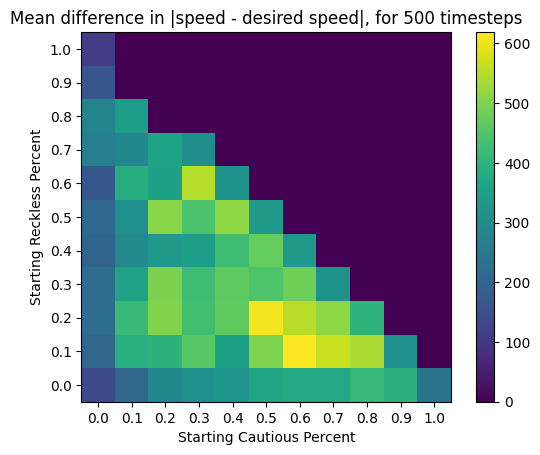

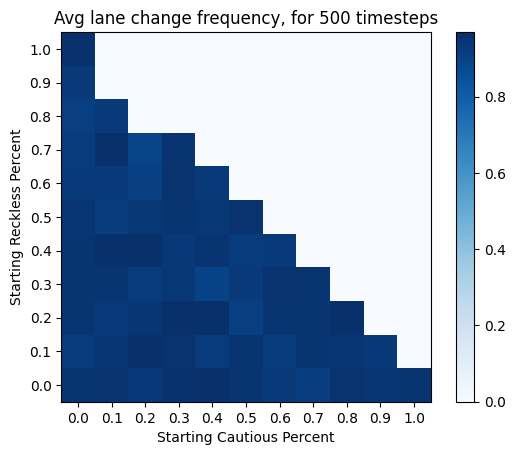

/tmp/ipykernel_2606/3290891866.py:4: RuntimeWarning: divide by zero encountered in log
  log_lane_changes = np.log(lane_changes)


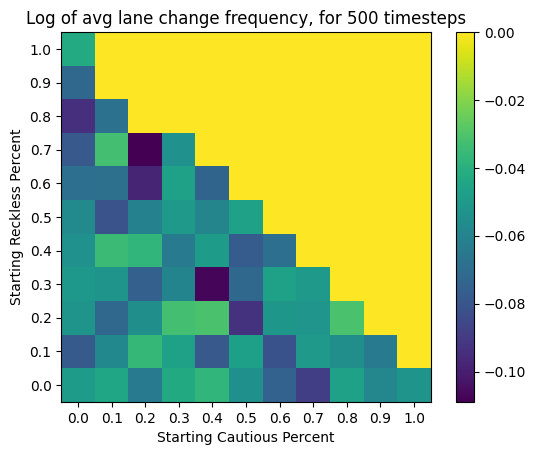

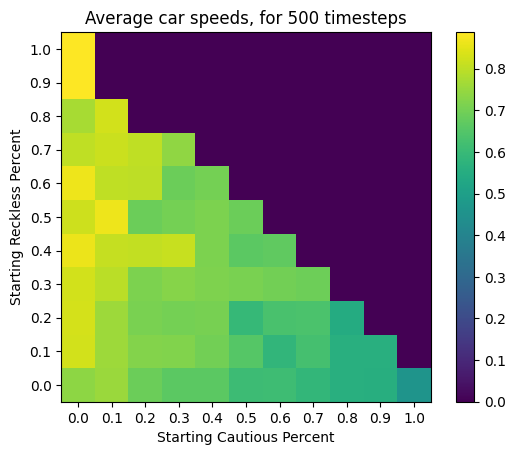

In [315]:
plot_diff_in_desired_speed(desired_speed_diffs_mat)
plot_avg_lane_changes(lane_changes_mat)
plot_log_avg_lane_changes(lane_changes_mat)
plot_avg_speed(avg_speeds_mat)
plt.show()